In [8]:
from pryzma import run_simulation
import numpy as np
import matplotlib.pyplot as plt



# Zadanie 1

Stan stacjonarny osiągnięty


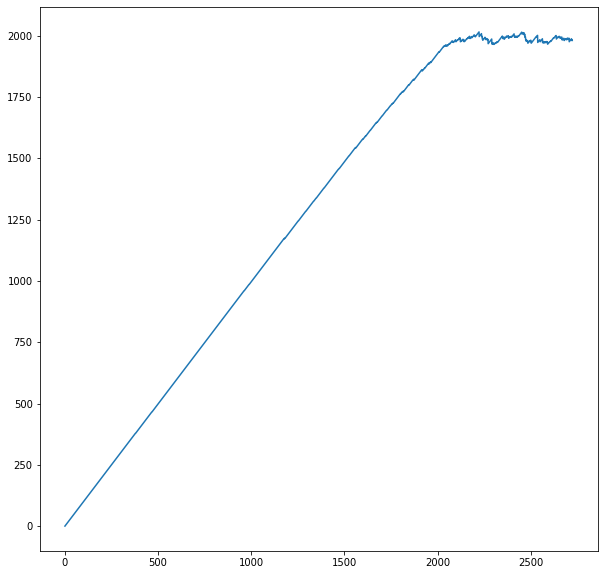

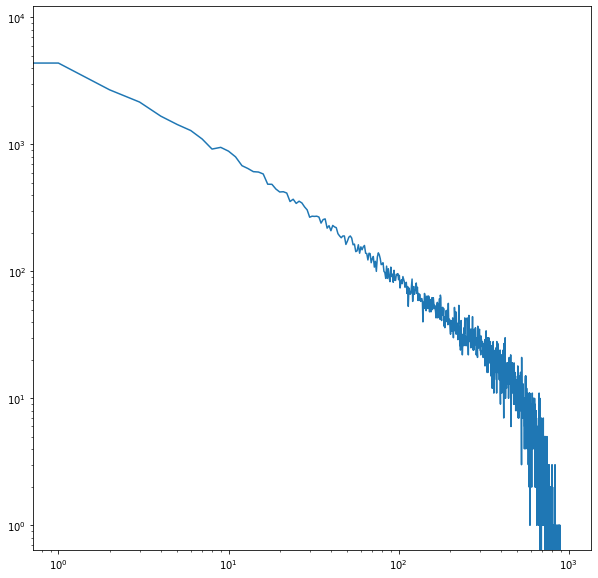

In [4]:
res = run_simulation(31, 3, 140000, 500)

fig = plt.figure(figsize=(10, 10))

plt.plot(res[1:])
plt.xscale('log')
plt.yscale('log')
plt.show()

## Badanie współczynnika a

In [5]:
res[0]

0

In [20]:
from scipy.optimize import curve_fit

treshold = 300

def power_law(x, a, b):
    return np.power(x, a)*b

def lin_law(x, a, b):
    return a*x + b

def curve_fit_log(x, y):
    x_log = np.log10(x)
    y_log = np.log10(y)

    params, _  = curve_fit(lin_law, x_log, y_log)

    params[1] = np.power(10, params[1])

    return params



xs = np.arange(1, treshold+1)

a, _ = curve_fit(power_law, xs, res[1:treshold + 1], p0=[-2, 5000])


a_log = curve_fit_log(xs, res[1:treshold+1])

a[0], a[1], a_log[0], a_log[1]


(-0.9522550466946359,
 7918.6736709894585,
 -1.037905734948321,
 10132.419808252498)

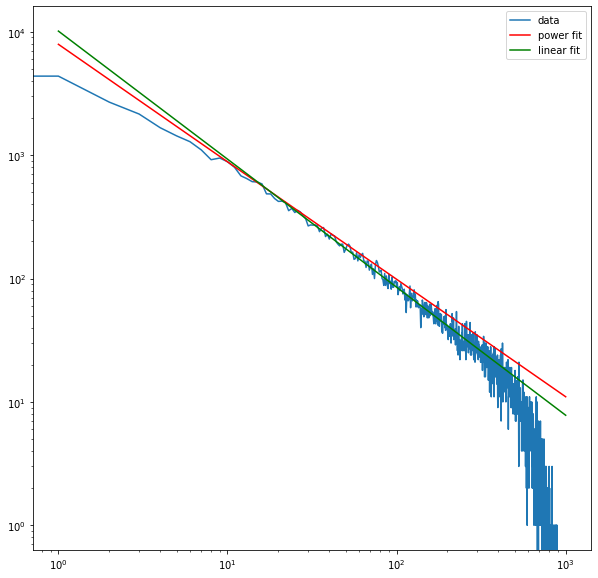

In [31]:

plt.figure(figsize=(10, 10))

plt.plot(res[1:], label='data')
plt.xscale('log')
plt.yscale('log')

xs = np.linspace(1, 1000, 100)


plt.plot(xs, power_law(xs, a[0], a[1]), label='power fit',color='r' )
plt.plot(xs, power_law(xs, a_log[0], a_log[1]), label='linear fit', color='g')
plt.legend(loc='best');

# Zadanie 2

In [33]:
from pryzma import SandHeap
import matplotlib.animation as animation

In [ ]:
fig = plt.figure()

heap = SandHeap(52, 3)

ax = fig.add_subplot(111)
ax.set_title('Height of the Sandpile')
cax = ax.imshow()